In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

df = pd.read_csv('../datasets/Phishing_Email.csv')
df.head(3)

/Users/makarwuckert/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email


In [2]:
df.dropna(inplace=True)

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [4]:
df.rename(columns={"Email Text": "feature", "Email Type": "target"}, inplace=True)
df.head()

,feature,target
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [5]:
df.shape

(18634, 2)

In [12]:
label_counts = df['target'].value_counts()
label_counts

target
Safe Email        11322
Phishing Email     7312
Name: count, dtype: int64

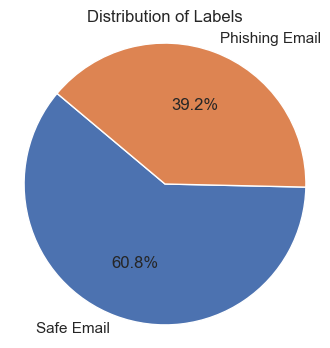

In [7]:
# Count the occurrences of each label
label_counts = df['target'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.savefig('label_distribution.png', bbox_inches='tight')
plt.show()

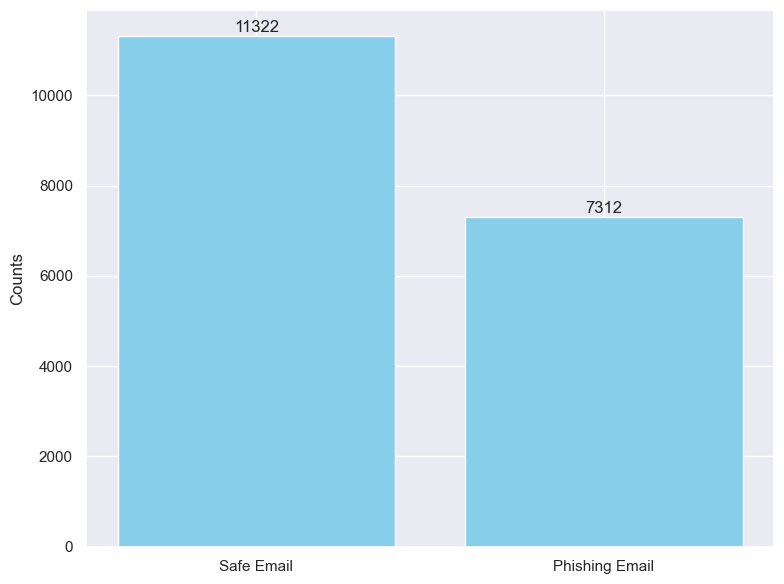

In [8]:
label_counts = df['target'].value_counts()

# Create a DataFrame
label_counts_df = pd.DataFrame({'Labels': label_counts.index, 'Counts': label_counts.values})
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a bar chart
plt.bar(label_counts_df['Labels'], label_counts_df['Counts'], color='skyblue')

# Adding labels to the bars
for i, count in enumerate(label_counts_df['Counts']):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

# Adding title and labels
plt.ylabel('Counts')

# Show the bar chart
plt.tight_layout()
plt.show()

/Users/makarwuckert/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

/Users/makarwuckert/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



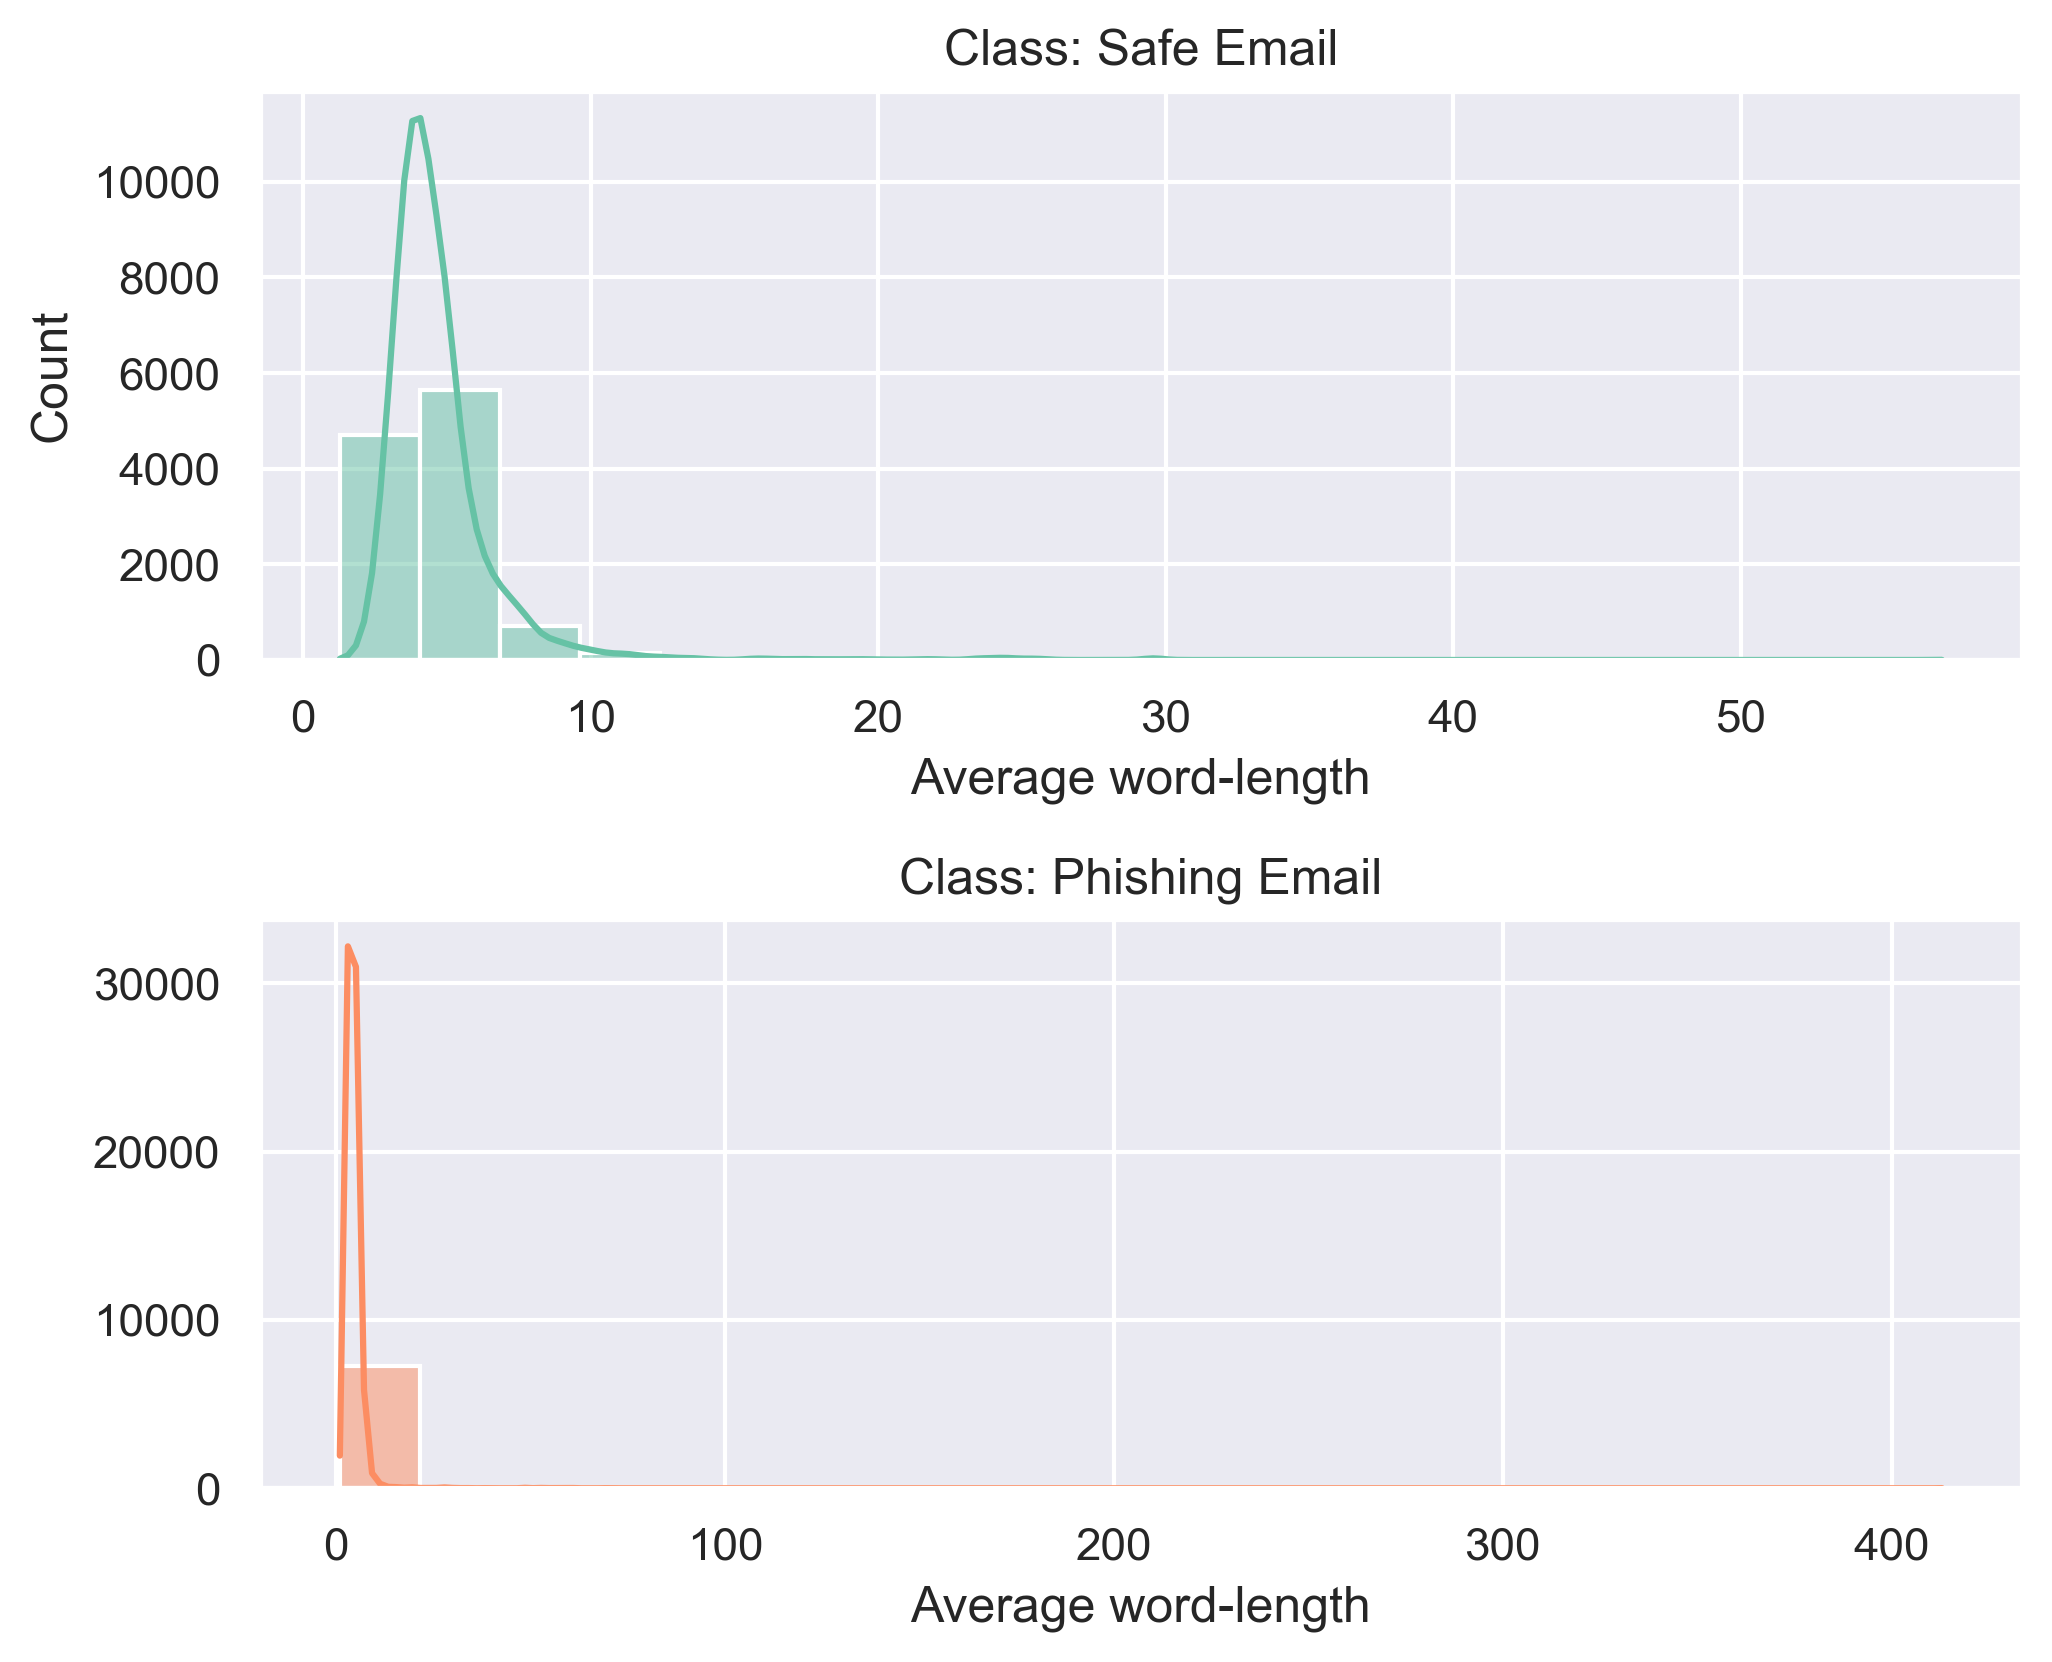

In [9]:
# Filter out non-string values in the 'feature' column
df['feature'] = df['feature'].astype(str)
#df = df[df['feature'].apply(lambda x: isinstance(x, str))]

# Split the 'feature' text and calculate the average word length
df['word_length'] = df['feature'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))

# Create a custom color palette
custom_palette = sns.color_palette("Set2", n_colors=len(df['target'].unique()))

# Create separate histograms for each label with custom colors
fig, ax = plt.subplots(2, 1, figsize=(7, 6), sharey=False, dpi=300)

for i, label in enumerate(df['target'].unique()):
    label_data = df[df['target'] == label]
    sns.histplot(
        x=label_data['word_length'],
        bins=20,
        ax=ax[i],
        color=custom_palette[i],
        kde=True,
    ).set_title(f'Class: {label}')

for i in range(2):
    ax[i].set_xlabel("Average word-length")
    if i != 0:
        ax[i].set_ylabel(" ")

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the plot in high quality
#plt.savefig('word_length_distribution.png', dpi=300, bbox_inches='tight')

plt.show()


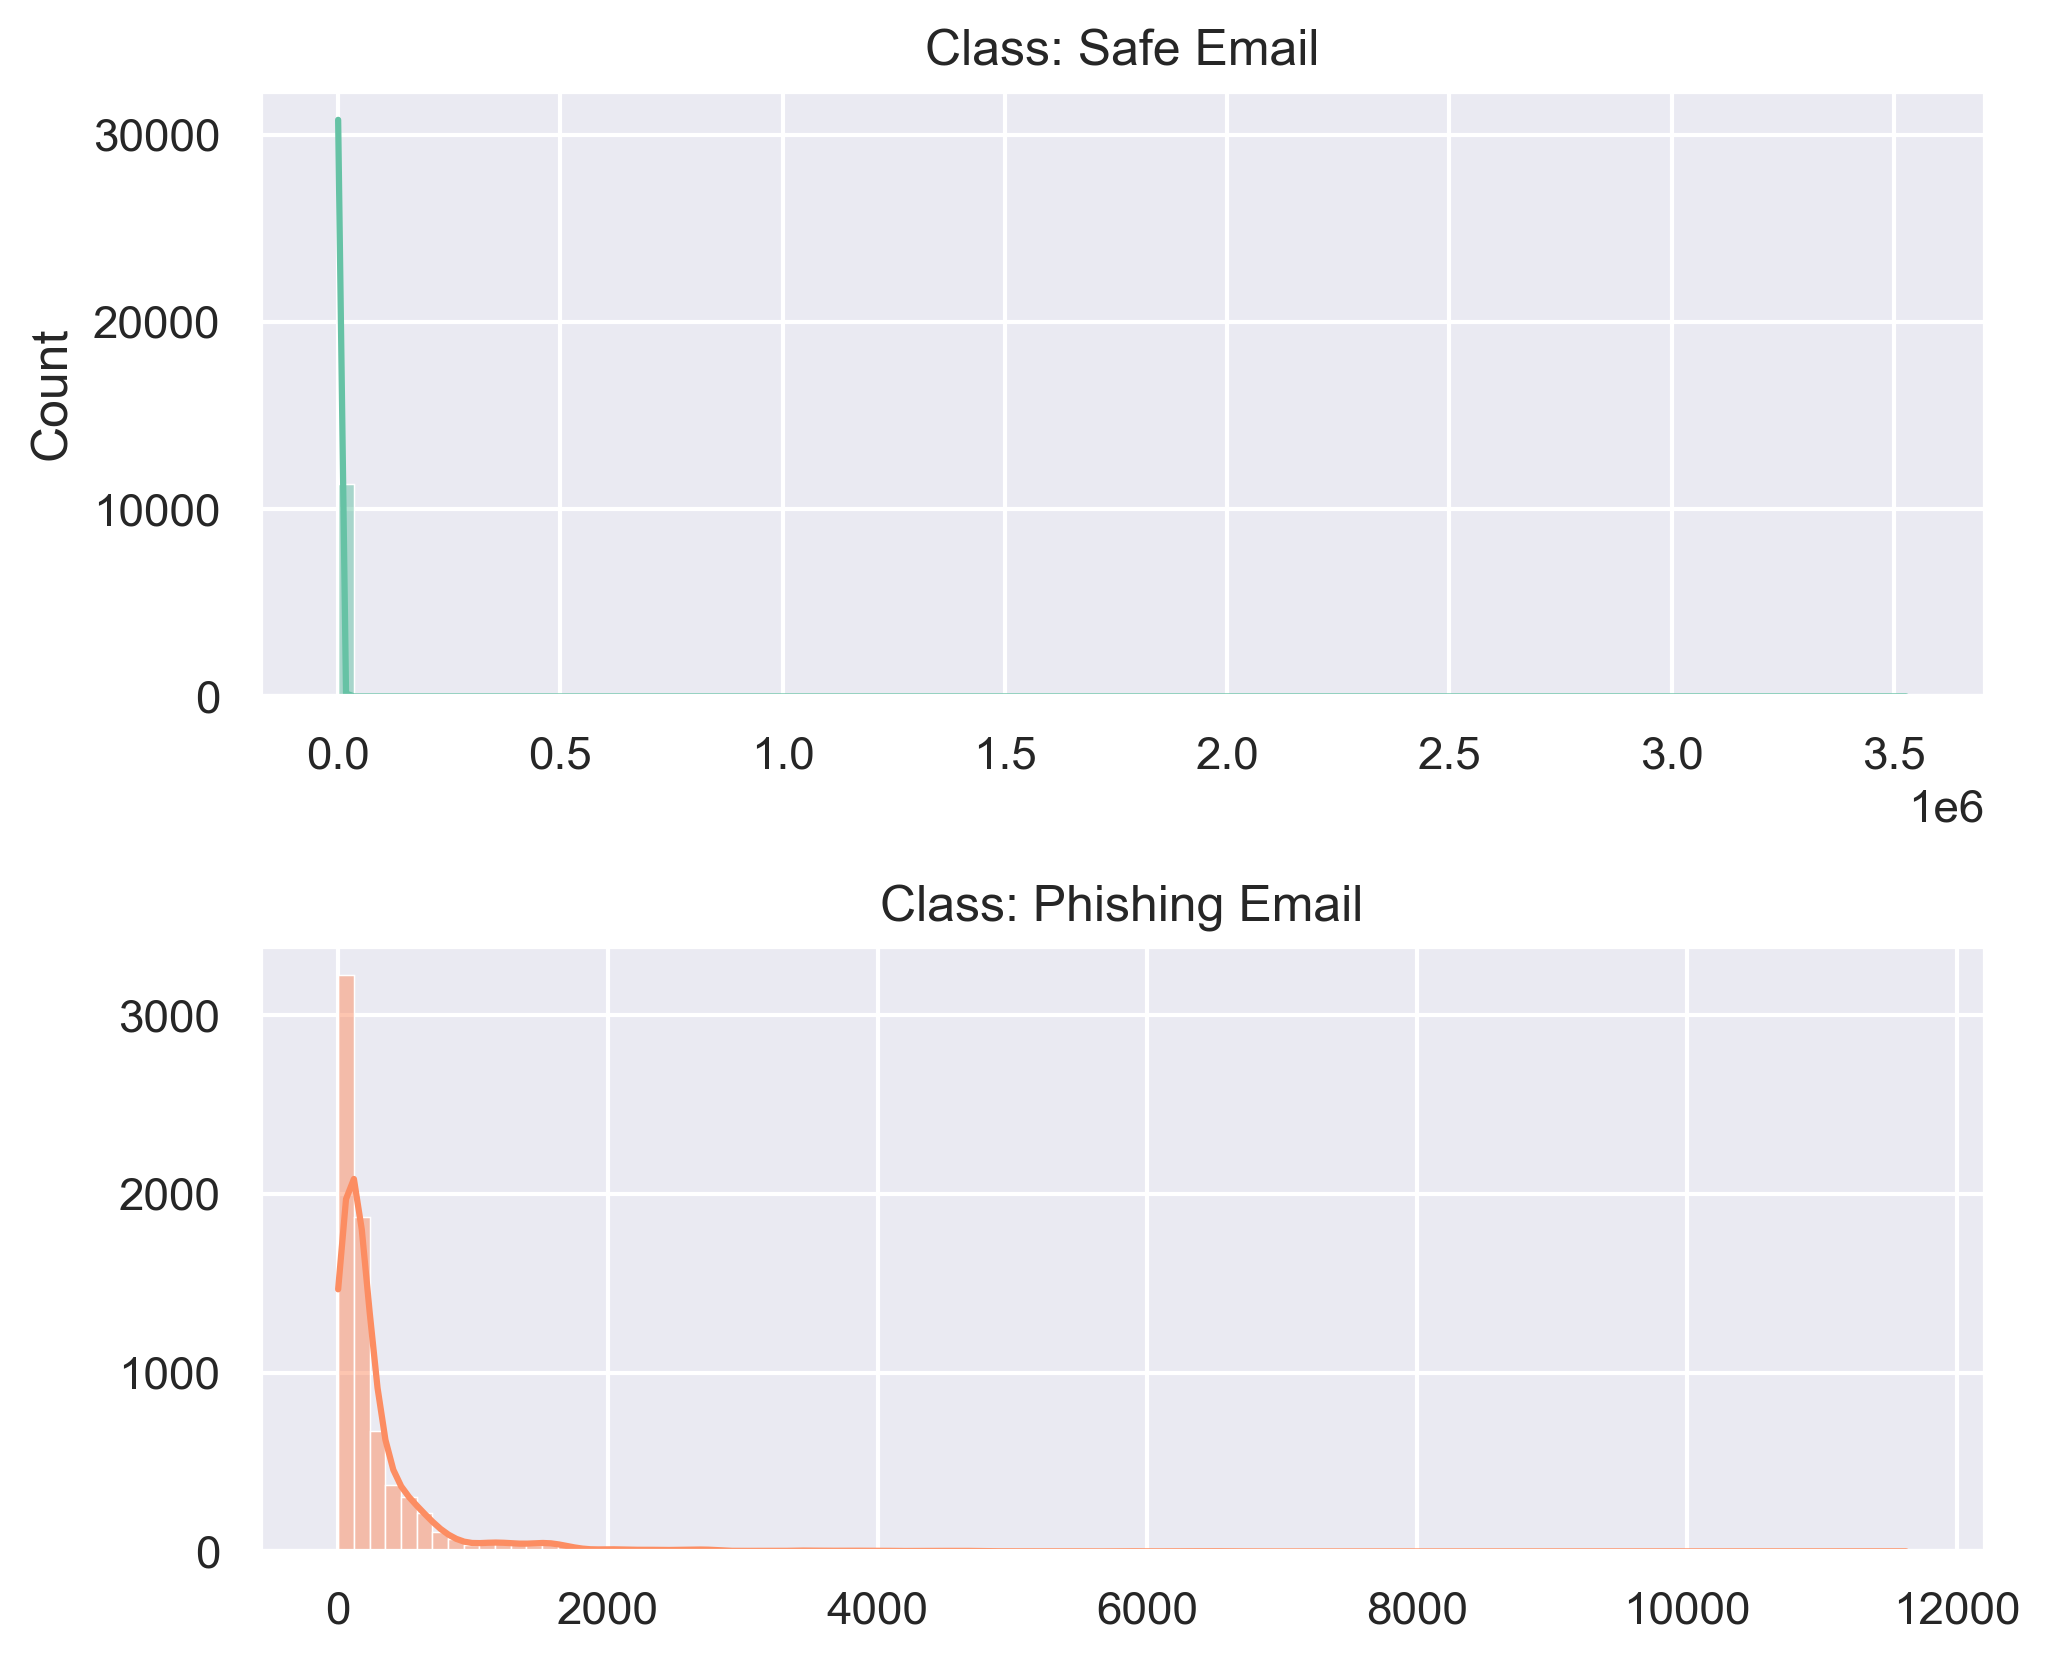

           target  word_count
0  Phishing Email  301.848058
1      Safe Email  685.870253


In [10]:
# Calculate the word count for each row and store it in a new column
df['word_count'] = df['feature'].str.split().apply(len)

# Calculate the average word count for each label category
average_word_counts_by_label = df.groupby('target')['word_count'].mean().reset_index()

# Create custom color palette
custom_palette = sns.color_palette("Set2", n_colors=len(df['target'].unique()))

# Create separate histograms for each label with custom colors
fig, ax = plt.subplots(2, 1, figsize=(7, 6), sharey=False, dpi=300)

for i, label in enumerate(df['target'].unique()):
    label_data = df[df['target'] == label]
    sns.histplot(
        x=label_data['word_count'],
        bins=100,
        ax=ax[i],
        color=custom_palette[i],
        kde=True,
    ).set_title(f'Class: {label}')

    # Set xlabel for the last subplot
    if i == 2:
        ax[i].set_xlabel("Number of words")
    else:
        ax[i].set_xlabel("")

    # Set ylabel for all subplots except the first one
    if i != 0:
        ax[i].set_ylabel(" ")


# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the plot in high quality
# plt.savefig('word_length_distribution.png', dpi=300, bbox_inches='tight')

plt.show()

# Display the average word counts by label
print(average_word_counts_by_label)

In [11]:
from wordcloud import WordCloud

target_categories = ['Phishing Email', 'Safe Email']
# Create a separate word cloud for each target category
for category in target_categories:
    # Filter the DataFrame by the current target category
    category_df = df[df['target'] == category]
    
    # Combine the text data from the 'feature' column for the current category into a single string
    text = ' '.join(category_df['feature'])
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

    # Plot the WordCloud for the current category
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

KeyboardInterrupt: 